# We will make a dataset of cloned voices to serve as our sinthetic data. We will be using the TIMIT dataset (https://github.com/philipperemy/timit) to feed our Coqui TTS model, and it can be encouterded here:  https://tts.readthedocs.io/en/latest/index.html#.

### Getting the model dependencies: pip install TTS

In [37]:
import os

from trainer import Trainer, TrainerArgs

from TTS.tts.configs.shared_configs import BaseDatasetConfig
from TTS.tts.configs.vits_config import VitsConfig
from TTS.tts.datasets import load_tts_samples
from TTS.tts.models.vits import Vits, VitsArgs, VitsAudioConfig
from TTS.tts.utils.speakers import SpeakerManager
from TTS.tts.utils.text.tokenizer import TTSTokenizer
from TTS.utils.audio import AudioProcessor

## data and output folders

In [38]:
dataset_path = 'C:\data\lisa\data\timit\raw\TIMIT\TRAIN'
output_path = './output'

We need to config the data set in this way:

![markdown tts.png](<attachment:markdown tts.png>)


It is  vctk dataset config needs, because it will be formatted for a multispeaker dataset
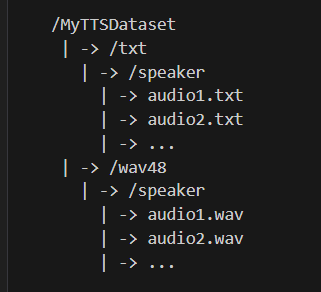

In [39]:
# define dataset config
# need to use vctk_old format if using wav files instead of flac

dataset_config = BaseDatasetConfig(
    formatter="vctk_old", meta_file_train="", language="en-us", path=dataset_path
)

In [40]:
audio_config = VitsAudioConfig(
    sample_rate=22050, win_length=1024, hop_length=256, num_mels=80, mel_fmin=0, mel_fmax=None
)

In [41]:
vitsArgs = VitsArgs(
    use_speaker_embedding=True,
)

In [42]:
config = VitsConfig(
    model_args=vitsArgs,
    audio=audio_config,
    run_name="vits_vctk",
    batch_size=32,
    eval_batch_size=16,
    batch_group_size=5,
    num_loader_workers=4,
    num_eval_loader_workers=4,
    run_eval=True,
    test_delay_epochs=-1,
    epochs=1000,
    text_cleaner="english_cleaners",
    use_phonemes=True,
    phoneme_language="en",
    phoneme_cache_path=os.path.join(output_path, "phoneme_cache"),
    compute_input_seq_cache=True,
    print_step=25,
    print_eval=False,
    mixed_precision=True,
    max_text_len=325,  # change this if you have a larger VRAM than 16GB
    output_path=output_path,
    datasets=[dataset_config],
    cudnn_benchmark=False,
)

In [43]:
# INITIALIZE THE AUDIO PROCESSOR
# Audio processor is used for feature extraction and audio I/O.
# It mainly serves to the dataloader and the training loggers.
ap = AudioProcessor.init_from_config(config)

 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


In [44]:

# INITIALIZE THE TOKENIZER
# Tokenizer is used to convert text to sequences of token IDs.
# config is updated with the default characters if not defined in the config.
tokenizer, config = TTSTokenizer.init_from_config(config)

In [45]:
# LOAD DATA SAMPLES
# Each sample is a list of ```[text, audio_file_path, speaker_name]```

train_samples, eval_samples = load_tts_samples(
    dataset_config,
    eval_split=True,
    eval_split_max_size=config.eval_split_max_size,
    eval_split_size=config.eval_split_size,
)

AssertionError:  [!] No training samples found in C:\data\lisa\data	imitaw\TIMIT\TRAIN/